In [1]:
from sklearn import ensemble, feature_selection, model_selection
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('./data/digit recognizor.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [4]:
rfc = ensemble.RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=0)
selector = feature_selection.RFE(rfc, n_features_to_select=300, step=50).fit(X, y)

In [5]:
selector.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,

In [6]:
selector.support_.sum()

300

In [7]:
selector.ranking_

array([11, 10,  9,  8,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  7,  7,
        6,  7,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  7,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  7,  7,  6,  5,
        5,  6,  4,  5,  5,  5,  6,  5,  6,  8,  7,  8,  8,  8,  9,  9,  9,
        9,  9,  9,  9,  9,  7,  8,  5,  4,  2,  3,  4,  4,  1,  1,  1,  1,
        1,  4,  4,  5,  6,  6,  6,  9,  9, 10, 10, 10, 10,  9, 10, 10,  5,
        5,  4,  3,  2,  1,  1,  1,  1,  1,  1,  1,  2,  2,  3,  4,  4,  5,
        6,  6, 10, 10, 11, 11, 11, 11,  8,  5,  5,  4,  3,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  4,  4,  6,  9, 11, 11, 11,
       11, 10,  5,  5,  4,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  3,  4,  5, 11, 11, 11, 11, 10,  8,  5,  4,  3,  3,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  3,
        5,  5, 11, 10, 11

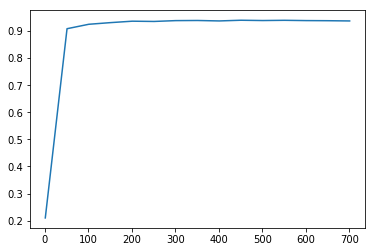

In [9]:
# 画学习曲线
score = []
for i in range(1, 751, 50):
    x_wrapper = feature_selection.RFE(rfc, n_features_to_select=i, step=50).fit_transform(X, y)
    score_mean = model_selection.cross_val_score(rfc, x_wrapper, y, cv=5).mean()
    score.append(score_mean)
plt.plot(range(1, 751, 50), score)
plt.show()